# Test of ADMM + DnCNN
let's denoise sar image.
using CNN as a step of the ADMM

In [1]:
import scipy
import numpy as np
import tensorflow as tf
from model import denoiser
from utils_train import *
import scipy.misc
import matplotlib.pyplot as plt
import imz2mat
import utils
import ADMM
%matplotlib inline

In [2]:
# We then run a session tf(WARNING : execute once)
# Don't forget to close
sess = tf.Session()
model = denoiser(sess, sigma=25, add_noise=False)

[*] Initialize model successfully...


imz2mat : version Septembre 2017
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .imf
image en .imf
('image en float', 1024, ' ', 1024, '  canaux:', 1, ' verif : ', 0)
('lecture de ', 'data/PileSaintGervais_moyennearithmetique.imf', ' en quelconque', 1024, 1024, 1, ' offset ', 0, '>f', 4, ' complex', 0, 'blocksize', 4194304)
Données réelles. Nouvelle version de imz2mat  >f
40817.9881529


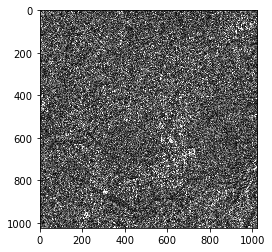

In [3]:
# load the ground truth
img_gt = imz2mat.imz2mat('data/PileSaintGervais_moyennearithmetique.imf')[0].astype(np.float32)

img_speckle = utils.addSARnoise(img_gt, L=1)


# psnr very low
img_gt_log = np.log(1+img_gt)
#img_gt_log = utils.robust_scale(img_gt, normal=False).astype(np.float32)
#img_in = utils.robust_scale(img_speckle, normal=False).astype(np.float32)
img_in = np.log(1+img_speckle)
#print(cal_psnr(img_gt_log, img_in))
print(cal_mse(np.exp(img_gt_log)-1, np.exp(img_in)-1))
utils.displayRSO(np.sqrt(img_speckle))


In [20]:
# load the weights here for sigma=25
ckpt_dir = "./checkpoint_sar"
model.load(ckpt_dir)

[*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint_sar/DnCNN-tensorflow-50650


(True, 50650)

17254.140065


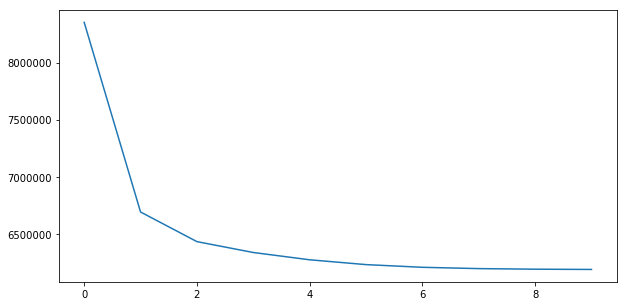

In [5]:
# Test admm alone
out, E = ADMM.ADMM(img_in, beta = 0.7,lamb = 1,niter = 10)
plt.figure(figsize=(10,5))
plt.plot(E)
out = out + scipy.special.digamma(1)
#print(cal_psnr(img_gt_log, out))
print(cal_mse(np.exp(img_gt_log)-1, np.exp(out)-1))

In [21]:
# Test DnCNN
C = np.max(img_in)-np.min(img_in)
b = img_in.min()/C
img_inp = img_in/C - b
img_input = img_inp.reshape(1, img_in.shape[1], img_in.shape[0],1)
out2, _, _ = model.denoise(img_input)
out2 = out2.reshape(img_in.shape)
out2 = C*(out2+b)
out2 = out2 + scipy.special.digamma(1)
print(cal_mse(np.exp(img_gt_log)-1, np.exp(out2)-1))

22161.5628689


In [ ]:
# We mixed both
out3, E = ADMM.ADMM(img_in, beta = 1,lamb = 1,niter = 10, CNNprior=model)
plt.figure(figsize=(10,5))
plt.plot(E)
out3 = out3 + scipy.special.digamma(1)
print(cal_mse(np.exp(img_gt_log)-1, np.exp(out3)-1))

CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet
CNNprior not included yet


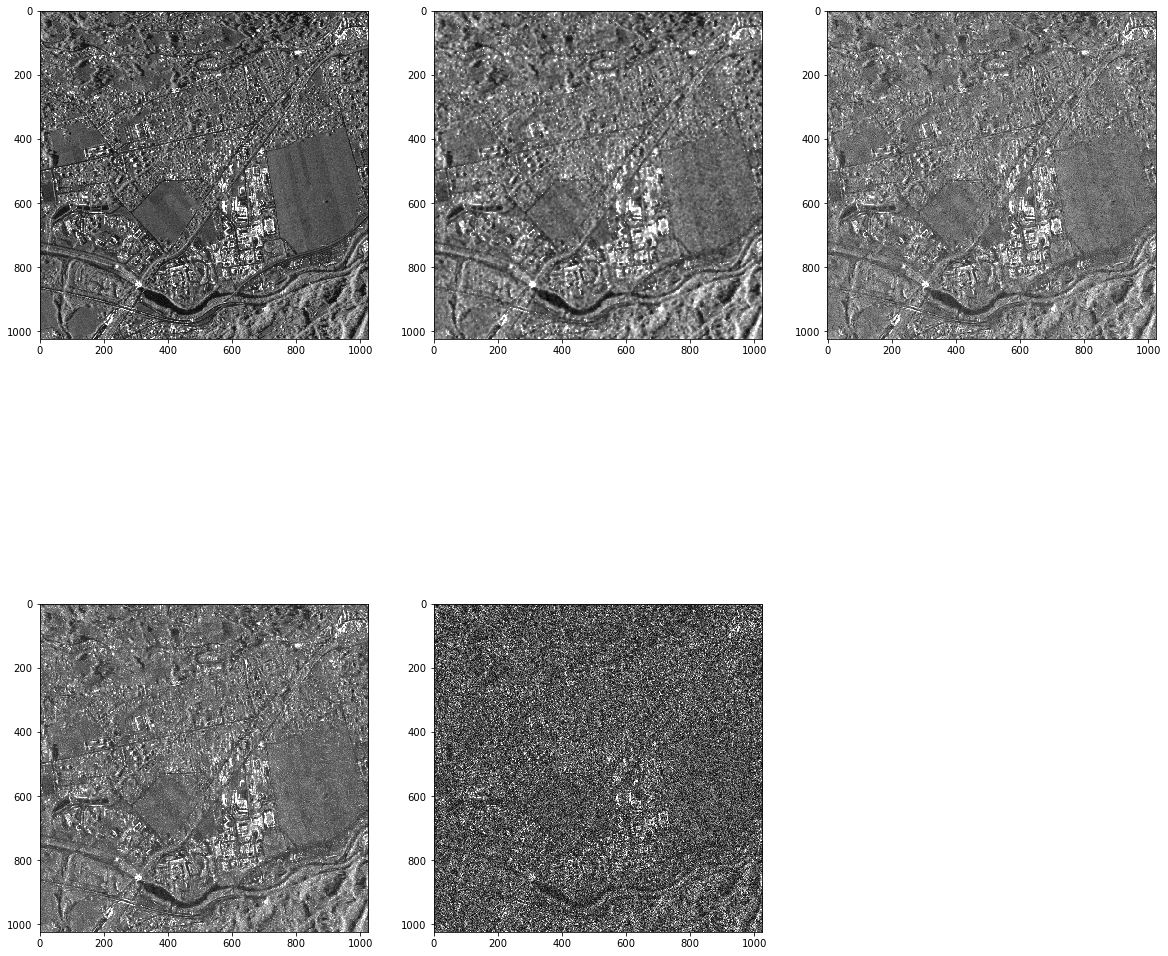

In [23]:
#display the result
plt.figure(figsize=(20,20))
plt.subplot(231)
utils.displayRSO(np.sqrt(np.exp(img_gt_log)-1))
plt.subplot(232)
utils.displayRSO(np.sqrt(np.exp(out)-1))
plt.subplot(233)
utils.displayRSO(np.sqrt(np.exp(out2)-1))
plt.subplot(234)
utils.displayRSO(np.sqrt(np.exp(out3)-1))
plt.subplot(235)
utils.displayRSO(np.sqrt(np.exp(img_in)-1))

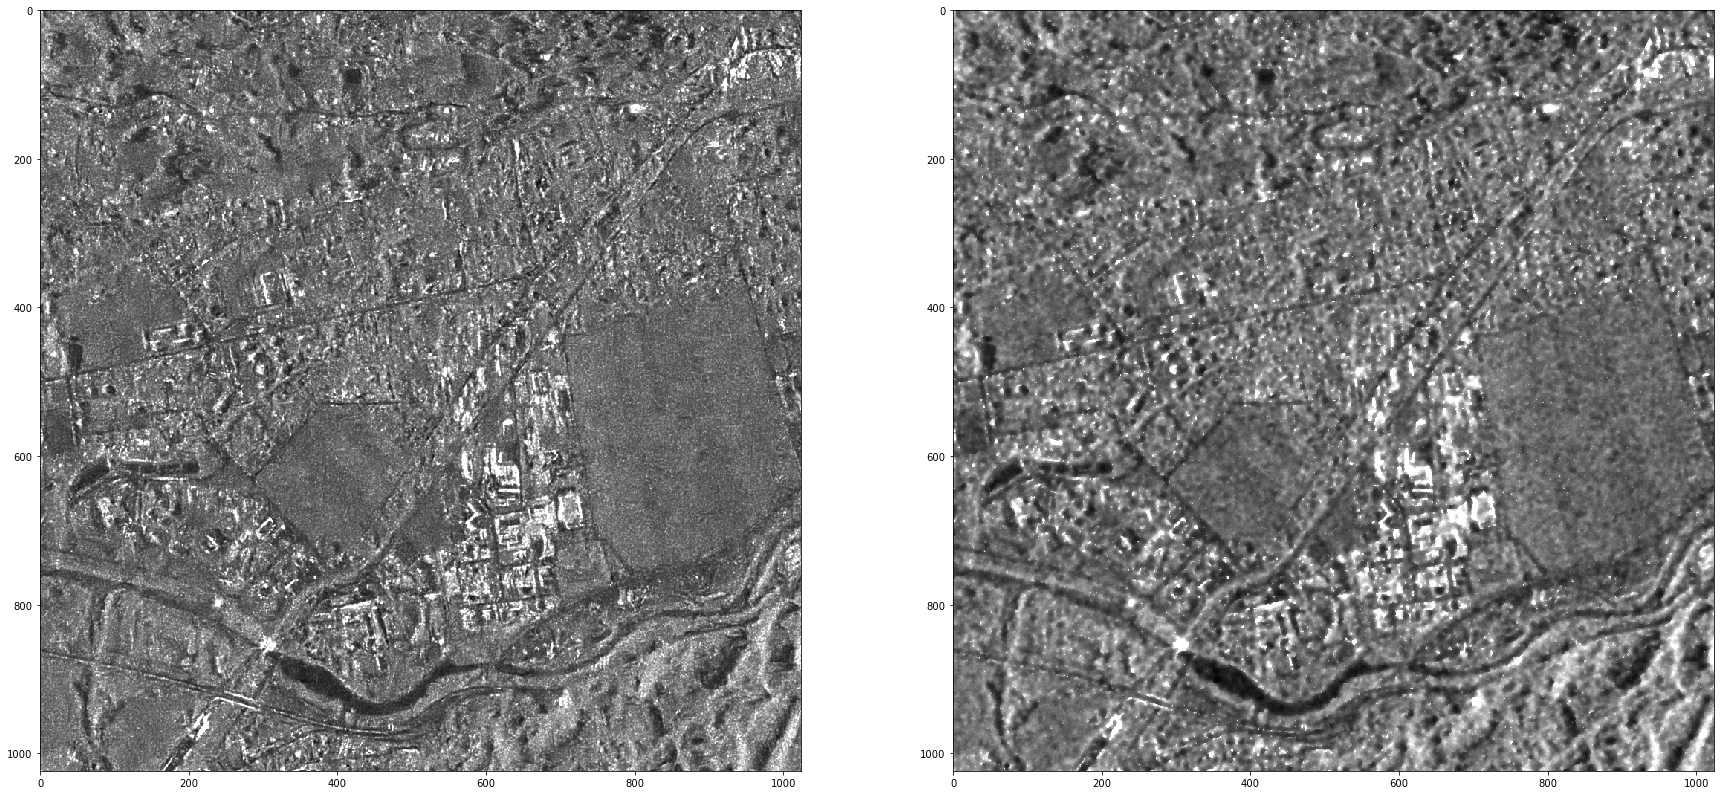

In [24]:
plt.figure(figsize=(30,30))
plt.subplot(121)
utils.displayRSO(np.sqrt(np.exp(out3)-1))
plt.subplot(122)
utils.displayRSO(np.sqrt(np.exp(out)-1))

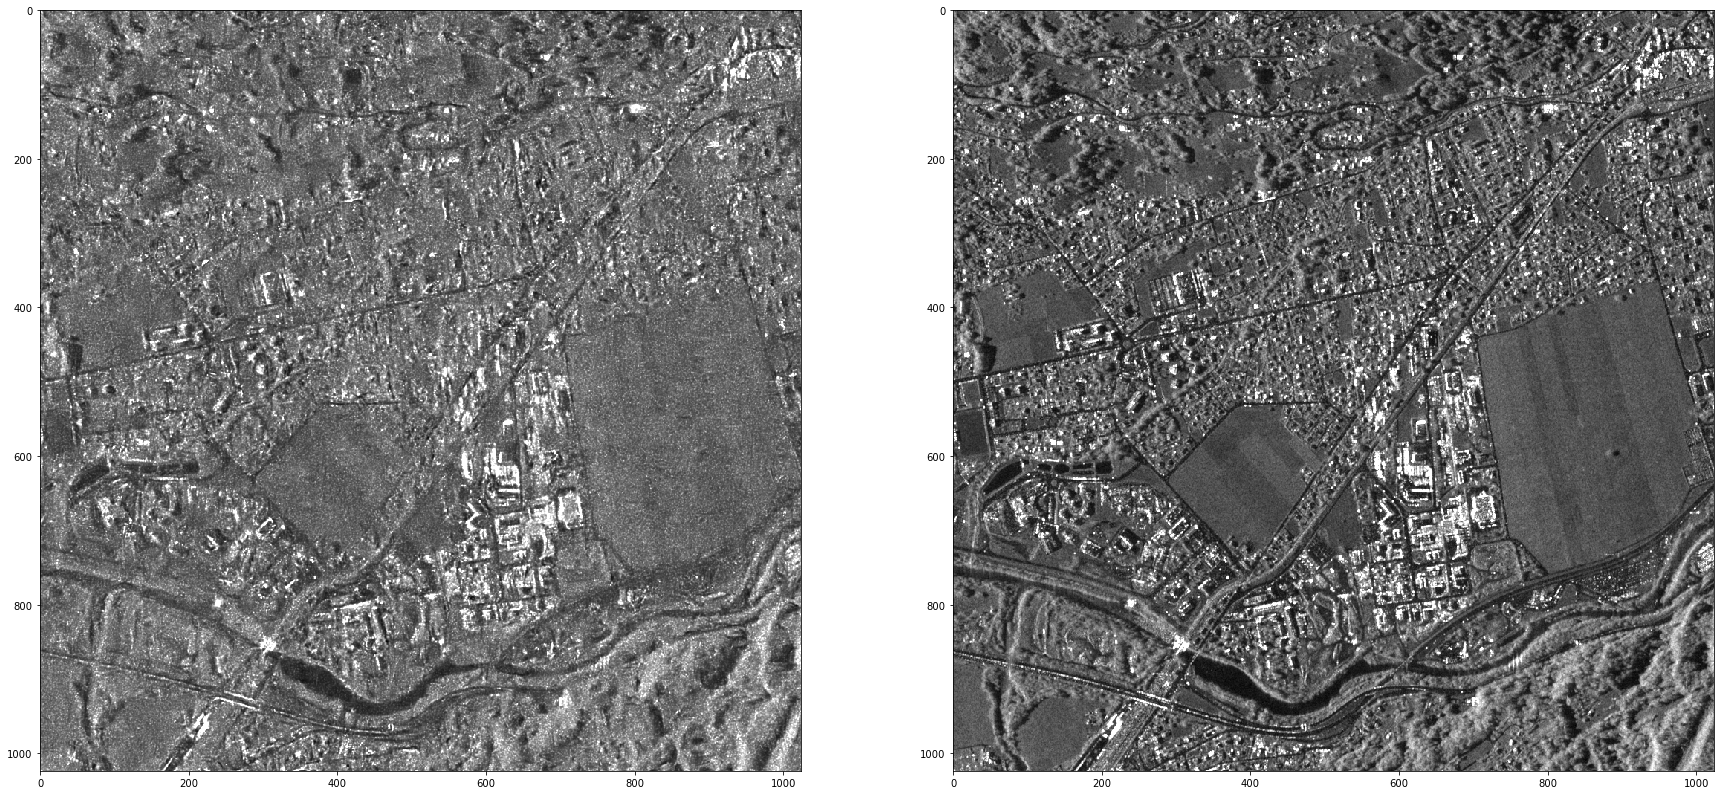

In [25]:
plt.figure(figsize=(30,30))
plt.subplot(121)
utils.displayRSO(np.sqrt(np.exp(out3)-1))
plt.subplot(122)
utils.displayRSO(np.sqrt(np.exp(img_gt_log)-1))